In [1]:
from keras import models
from keras import layers
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



2121728/2110848 [==============================] - 0s 0us/step


In [2]:

word_index = reuters.get_word_index()

reversed_word_index = dict([(value, key) for (key,value) in word_index.items()])

decode = ' '.join([reversed_word_index.get(i - 3, '&*&') for i in train_data[3]])

decode


565248/550378 [==============================] - 0s 0us/step


"&*& the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely &*& borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in &*& financial eligibility standards indicated as many as one half of &*& borrowers who received new loans from the agency in 1986 would be &*& under the proposed system the agency has proposed evaluating &*& credit using a variety of financial ratios instead of relying solely on &*& ability senate agriculture committee chairman patrick leahy d vt &*& the proposed eligibility changes telling &*& administrator &*& clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming

In [3]:
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1.
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train.shape
x_test.shape

(2246, 10000)

In [5]:
# for i, j in enumerate(train_data):
#   print((i,j))

In [6]:
# x_train[2:12,]

def to_one_hot(labels, dimension=46):
  result = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    result[i, label] = 1.
  return result

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [7]:
x_test[564][:20]
# test_labels[1]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1.])

In [8]:
mod = models.Sequential()
mod.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
mod.add(layers.Dense(64, activation='relu'))
mod.add(layers.Dense(46, activation='softmax'))



In [9]:
mod.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
reduced_x_train = x_train[1000:]

y_val = y_train[:1000]
reduced_y_train = y_train[1000:]

In [11]:
neu = mod.fit(reduced_x_train,
              reduced_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.5606 - accuracy: 0.4877 - val_loss: 1.6820 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.4035 - accuracy: 0.7055 - val_loss: 1.2900 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0613 - accuracy: 0.7720 - val_loss: 1.1201 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8419 - accuracy: 0.8202 - val_loss: 1.0210 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6744 - accuracy: 0.8593 - val_loss: 0.9549 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5426 - accuracy: 0.8857 - val_loss: 0.9099 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4388 - accuracy: 0.9097 - val_loss: 0.8892 - val_accuracy: 0.8190
Epoch 8/20
16

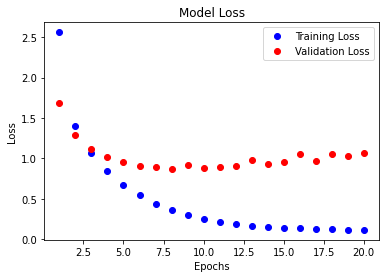

In [12]:
loss = neu.history['loss']
val_loss = neu.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



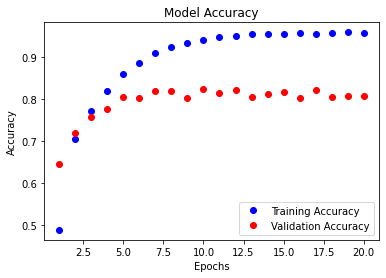

In [13]:
accu = neu.history['accuracy']
val_accu = neu.history['val_accuracy']

plt.plot(epochs, accu, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accu, 'ro', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [14]:
np.min(val_loss)
np.argmin(val_loss)
val_loss[8]

np.max(val_accu)
np.argmax(val_accu)
val_accu[8]


0.8019999861717224

In [15]:
new_mod = models.Sequential()
new_mod.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
new_mod.add(layers.Dense(64, activation='relu'))
new_mod.add(layers.Dense(46, activation='softmax'))

new_mod.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

new_mod.fit(reduced_x_train,
            reduced_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))

results = new_mod.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 2.6125 - accuracy: 0.5018 - val_loss: 1.7030 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.3909 - accuracy: 0.7121 - val_loss: 1.2776 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.0252 - accuracy: 0.7783 - val_loss: 1.1142 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8110 - accuracy: 0.8290 - val_loss: 1.0310 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6493 - accuracy: 0.8666 - val_loss: 0.9686 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5179 - accuracy: 0.8924 - val_loss: 0.9025 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4167 - accuracy: 0.9108 - val_loss: 0.8764 - val_accuracy: 0.8260
Epoch 8/9
16/16 [===

[0.9700323343276978, 0.7925200462341309]

In [16]:
new_mod = models.Sequential()
new_mod.add(layers.Dense(82, activation='relu', input_shape=(10000,)))
new_mod.add(layers.Dense(82, activation='relu'))
new_mod.add(layers.Dense(46, activation='softmax'))

new_mod.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

neural = new_mod.fit(reduced_x_train,
            reduced_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

results = new_mod.evaluate(x_test, y_test)


Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.3924 - accuracy: 0.5426 - val_loss: 1.5424 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.2740 - accuracy: 0.7261 - val_loss: 1.2156 - val_accuracy: 0.7390
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 0.9456 - accuracy: 0.8016 - val_loss: 1.0756 - val_accuracy: 0.7750
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.7317 - accuracy: 0.8454 - val_loss: 1.0131 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.5703 - accuracy: 0.8826 - val_loss: 0.9465 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4467 - accuracy: 0.9082 - val_loss: 0.9310 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.3485 - accuracy: 0.9272 - val_loss: 0.9103 - val_accuracy: 0.8180
Epoch 8/20
16

[1.2007488012313843, 0.790739119052887]


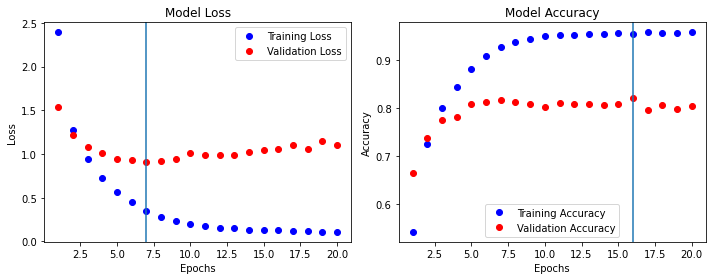

In [17]:
print(results)

loss = neural.history['loss']
val_loss = neural.history['val_loss']

accu = neural.history['accuracy']
val_accu = neural.history['val_accuracy']

epochs = range(1, len(loss) + 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].plot(epochs, loss, 'bo', label='Training Loss')
axes[0].plot(epochs, val_loss, 'ro', label='Validation Loss')
axes[0].axvline(x=np.argmin(val_loss)+1)
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(epochs, accu, 'bo', label='Training Accuracy')
axes[1].plot(epochs, val_accu, 'ro', label='Validation Accuracy')
axes[1].axvline(x=np.argmax(val_accu)+1)
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

fig.tight_layout()

In [18]:
new_mod = models.Sequential()
new_mod.add(layers.Dense(82, activation='relu', input_shape=(10000,)))
new_mod.add(layers.Dense(82, activation='relu'))
new_mod.add(layers.Dense(46, activation='softmax'))

new_mod.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

neural = new_mod.fit(reduced_x_train,
            reduced_y_train,
            epochs=7,
            batch_size=512,
            validation_data=(x_val, y_val))

results = new_mod.evaluate(x_test, y_test)
results

Epoch 1/7
16/16 [==============================] - 2s 72ms/step - loss: 2.4645 - accuracy: 0.5392 - val_loss: 1.5746 - val_accuracy: 0.6630
Epoch 2/7
16/16 [==============================] - 1s 59ms/step - loss: 1.2848 - accuracy: 0.7283 - val_loss: 1.2059 - val_accuracy: 0.7190
Epoch 3/7
16/16 [==============================] - 1s 59ms/step - loss: 0.9314 - accuracy: 0.8017 - val_loss: 1.0479 - val_accuracy: 0.7700
Epoch 4/7
16/16 [==============================] - 1s 58ms/step - loss: 0.7094 - accuracy: 0.8533 - val_loss: 0.9418 - val_accuracy: 0.8010
Epoch 5/7
16/16 [==============================] - 1s 58ms/step - loss: 0.5502 - accuracy: 0.8886 - val_loss: 0.9164 - val_accuracy: 0.7990
Epoch 6/7
16/16 [==============================] - 1s 57ms/step - loss: 0.4279 - accuracy: 0.9104 - val_loss: 0.8514 - val_accuracy: 0.8270
Epoch 7/7
71/71 [==============================] - 0s 4ms/step - loss: 0.9959 - accuracy: 0.7867


[0.9959058165550232, 0.7867319583892822]